## Logistic Regression

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression), or logit regression, or is a regression model where the outcome variable is categorical. Often this is used when the variable is binary (e.g. yes/no, survived/dead, pass/fail, etc.)

Logistic regression measures the relationship between the categorical response variable and one or more predictor variables by estimating probabilities. 




In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression
%matplotlib inline
#  the number of hours each student spent studying, and whether they passed (1) or failed (0).
url = 'http://nikbearbrown.com/YouTube/MachineLearning/DATA/Hours_vs_Pass_Exam.csv'
hours_pass = pd.read_csv(url)
hours_pass.head()

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


### Probability of passing an exam versus hours of study  

Suppose we wish to answer the following question:

_A group of 20 students spend between 0 and 6 hours studying for an exam. How does the number of hours spent studying affect the probability that the student will pass the exam?_

Note that the dependent variable pass/fail represented by "1" and "0" are categorical. A standard linear regression line of the form $y = \beta_0 + \beta_1 x + \varepsilon$ doesn't fit the data well.

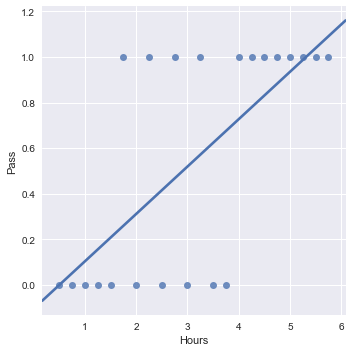

In [32]:
sns.lmplot(x='Hours', y='Pass', data=hours_pass, ci=None)

## Logistic function (S-curve)

A *[logistic function](https://en.wikipedia.org/wiki/Logistic_function)* or *logistic curve* is a common "S" shape curve, with equation:

$$f(x) = \frac{1}{1 + \mathrm e^{-x}} $$ 

$$f(x) = \frac{L}{1 + \mathrm e^{-k(x-x_0)}} $$

where  

* $e$ = the natural logarithm base $e$ (also known as $e$ or Euler's number),   
* $x_0$ = the $x$-value of the sigmoid's midpoint,    
* $L$ = the curve's maximum value, and     
* $k$ = the steepness of the curve.    

For values of $x$ in the range of real number's from $-\infty$ to $\infty$, the S-curve shown on the right is obtained (with the graph of $f$ approaching $L$ as $x$ approaches $\infty$ and approaching zero as $x$ approaches $-\infty$).

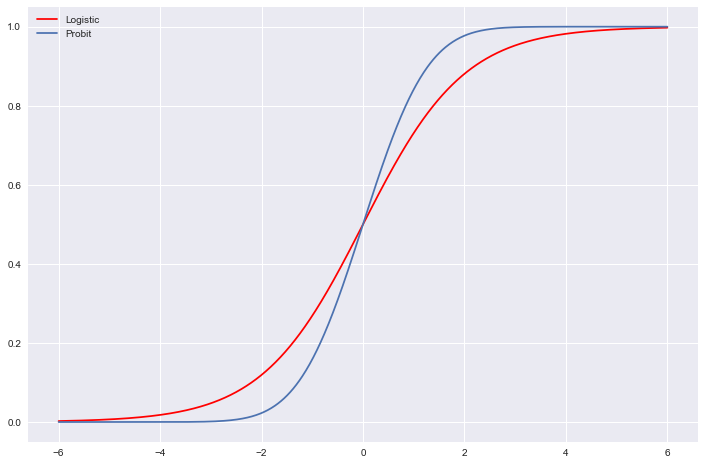

In [33]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.cdf(support), 'r-', label='Logistic')
ax.plot(support, stats.norm.cdf(support), label='Probit')
ax.legend();

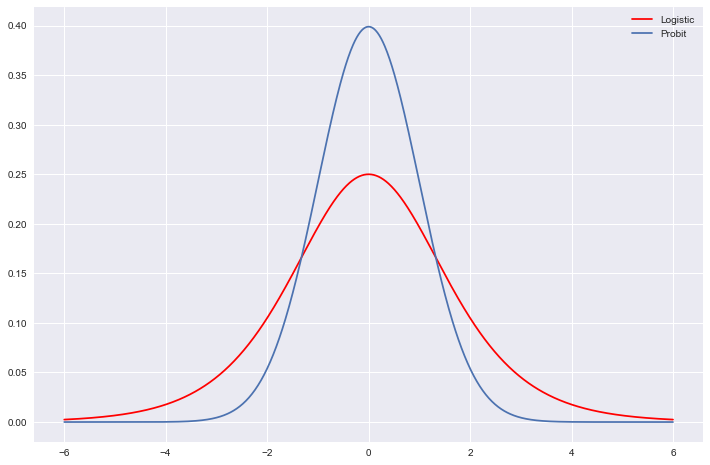

In [34]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.pdf(support), 'r-', label='Logistic')
ax.plot(support, stats.norm.pdf(support), label='Probit')
ax.legend();

### Logistic Regression

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\ln \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.

Probability is sometimes written as $\pi$:

$$\ln \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the **logistic function**:

$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

In [35]:
hours_pass_model = sm.Logit(hours_pass['Pass'], hours_pass['Hours']).fit()
hours_pass_model.summary()
#hours_pass_model=logreg.fit(hours_pass['Hours'], hours_pass['Pass'])
#hours_pass_model.coef_

Optimization terminated successfully.
         Current function value: 0.617994
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   22
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            0
Date:                Mon, 24 Apr 2017   Pseudo R-squ.:                  0.1031
Time:                        17:59:52   Log-Likelihood:                -13.596
converged:                       True   LL-Null:                       -15.158
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Hours          0.2366      0.139      1.701      0.089        -0.036     0.509
==============================================================================
"""

The output indicates that hours studying is significantly associated with the probability of passing the exam ($p = 0.0167$, [Wald test](https://en.wikipedia.org/wiki/Wald_test)). The output also provides the coefficients for $\text{Intercept} = - 4.0777$ and $\text{Hours} = 1.5046$. These coefficients are entered in the logistic regression equation to estimate the probability of passing the exam:

$$
\text{Probability of passing exam} = \frac{1}{1 + \text{exp} \left( - \left( 1.5046 \cdot \text{Hours} - 4.0777 \right) \right) }
$$

For example, for a student who studies 2 hours, entering the value $$\text{Hours} = 2$$ in the equation gives the estimated probability of passing the exam of 0.26:

$$
\text{Probability of passing exam} = \frac{1}{1 + \text{exp}\left( - \left( 1.5046 \cdot 2 - 4.0777 \right) \right) } = 0.26
$$

Similarly, for a student who studies 4 hours, the estimated probability of passing the exam is 0.87:

$$
\text{Probability of passing exam} = \frac{1}{1 + \text{exp}\left( - \left( 1.5046 \cdot 4 -  4.0777 \right) \right) } = 0.87
$$


In [36]:
hours_pass_model = sm.Logit(hours_pass['Pass'], hours_pass['Hours']).fit()
hours_pass_model.summary()

Optimization terminated successfully.
         Current function value: 0.617994
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   22
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            0
Date:                Mon, 24 Apr 2017   Pseudo R-squ.:                  0.1031
Time:                        17:59:52   Log-Likelihood:                -13.596
converged:                       True   LL-Null:                       -15.158
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Hours          0.2366      0.139      1.701      0.089        -0.036     0.509
==============================================================================
"""